https://www.youtube.com/watch?v=4b4MUYve_U8

## Supervised, Housing Price

In [11]:
from dlcliche.notebook import *
from dlcliche.utils import *
from dlcliche.torch_utils import *

# ! kaggle competitions download -c house-prices-advanced-regression-techniques
# ! cd /data/kaggle/competitions/house-prices-advanced-regression-techniques && unzip house-prices-advanced-regression-techniques.zip
DATA = Path('/data/kaggle/competitions/house-prices-advanced-regression-techniques')
TRAIN_CSV = DATA/'train.csv'
TEST_CSV = DATA/'test.csv'
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

! ls {DATA}

data_description.txt				 test.csv
house-prices-advanced-regression-techniques.zip  train.csv
sample_submission.csv


In [9]:
! cat {DATA}/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Using only size

- Cost function is $J(\theta) = 1/2 \sum_{i=0}^{M}(y  - h(x))$, 1/2 is making formula simpler when taking derivative.
- Squared error, not absolute -> explained in L3.
- LR, start with 0.01 and inc/dec later.
- Batch gradient descent - hard to cope with huge data -> mini batch gradient descent.

In [34]:
all_train_X = torch.tensor(train_df.LotArea)
all_train_y = torch.tensor(train_df.SalePrice)

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(all_train_X, all_train_y)

test_X = torch.tensor(test_df.LotArea)

def cost(hypothsis, theta, X, y):
    z = (y - hypothsis(theta, X))**2
    return 1/2*z.sum()

## a x + b
def h1(theta, X):
    return theta[0]*X + theta[1]

theta = torch.zeros((2,), requires_grad=True)

with torch.no_grad():
    print('train/val error for now:', cost(h1, theta, train_X, train_y), cost(h1, theta, val_X, val_y))

train/val error for now: tensor(2.1318e+13) tensor(7.1803e+12)


#### Batch GD

- Much slower than SGD, takes time to scan through tera byte data.

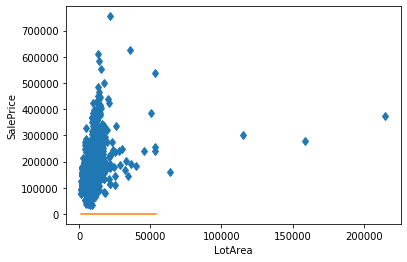

epoch:   0 loss:2.13183e+13 grad a:-2.30064e+12 grad b: -1.97939e+08 val loss: 5.5954e+12


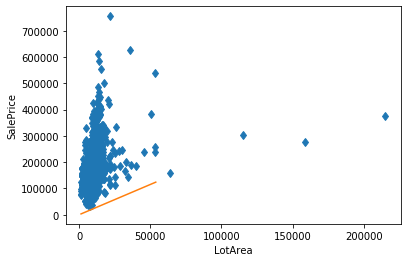

epoch:  10 loss:9.64899e+12 grad a:-1.78863e+11 grad b: -9.06535e+07 val loss: 3.41943e+12


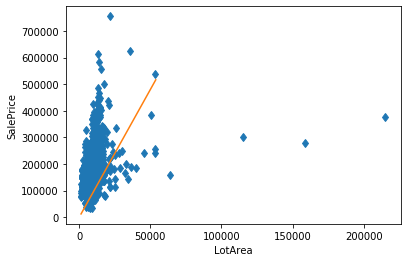

epoch:  20 loss:9.57846e+12 grad a:-1.39058e+10 grad b: -8.23126e+07 val loss: 3.43157e+12


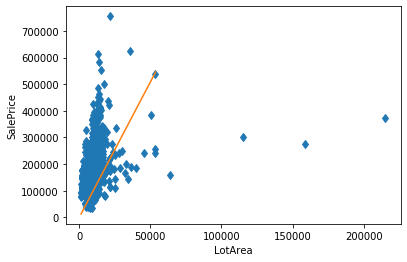

epoch:  30 loss:9.57803e+12 grad a:-1.08125e+09 grad b: -8.16642e+07 val loss: 3.43361e+12


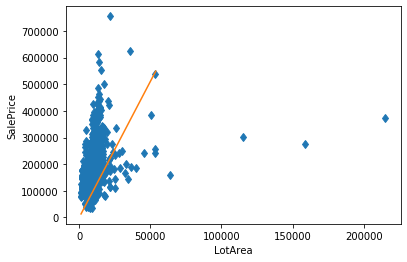

epoch:  40 loss:9.57803e+12 grad a:-8.38468e+07 grad b: -8.16138e+07 val loss: 3.43378e+12


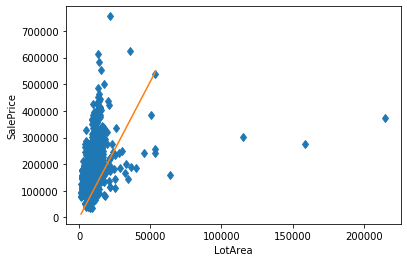

epoch:  50 loss:9.57803e+12 grad a:-6.31478e+06 grad b: -8.16098e+07 val loss: 3.43379e+12


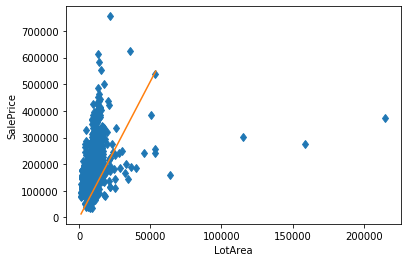

epoch:  60 loss:9.57803e+12 grad a:   -596128 grad b: -8.16095e+07 val loss: 3.43379e+12


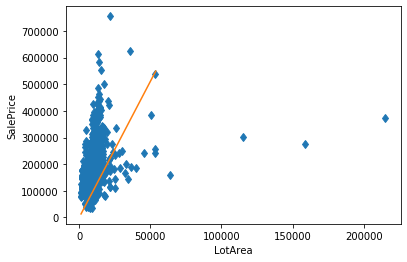

epoch:  70 loss:9.57803e+12 grad a:   -398496 grad b: -8.16095e+07 val loss: 3.43379e+12


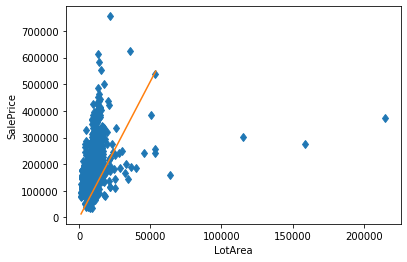

epoch:  80 loss:9.57803e+12 grad a:   -398496 grad b: -8.16095e+07 val loss: 3.43379e+12


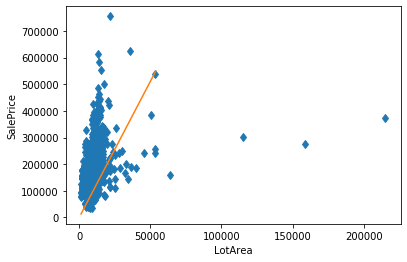

epoch:  90 loss:9.57803e+12 grad a:   -332704 grad b: -8.16095e+07 val loss: 3.43379e+12


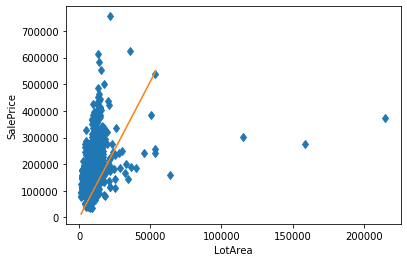

epoch: 100 loss:9.57803e+12 grad a:   -332704 grad b: -8.16095e+07 val loss: 3.43379e+12


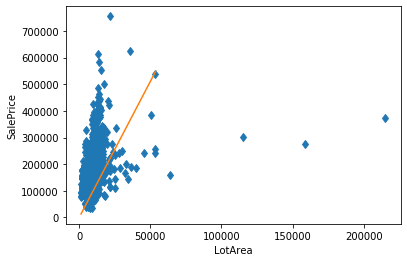

In [91]:
# Autograd is explained here: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

def N(v): return v.detach().numpy()
def plot_now():
    plt.plot(train_X, train_y, 'd')
    X = np.linspace(N(train_X).min(), N(train_X).max()//4)
    plt.plot(X, h1(N(theta), X))
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.show()

n_epochs = 101
learning_rate = 1e-12

theta = torch.zeros((2,), requires_grad=True)
plot_now()

for e in range(n_epochs):
    loss = cost(h1, theta, train_X, train_y)
    loss.backward() # will create .grad
    theta.data.sub_(learning_rate * theta.grad.data)
    with torch.no_grad():
        if e % 10 == 0:
            print((f'epoch:{e:4d} loss:{N(loss):10g} grad a:{N(theta.grad.data[0]):10g} '
                       f'grad b: {N(theta.grad.data[1]):10g} val loss: {N(cost(h1, theta, val_X, val_y)):10g}'))
            plot_now()
    theta.grad.zero_()

#### SGD

Run GD for each sample, then locus (or path or track) of loss in the loss space will be stochastic, rather than directly going down to the global optimum.

NOTE: Linear regression has a global optimum.

- Train loss gets smaller, but val loss becomes larger.

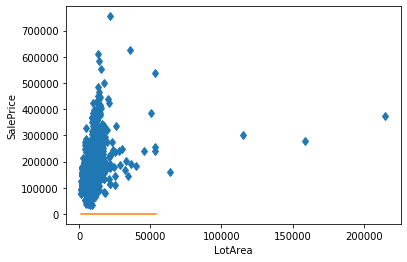

epoch:   0 loss:8.64195e+10 grad a:-3.31129e+11 grad b: -9.45107e+07 val loss: 5.38182e+13


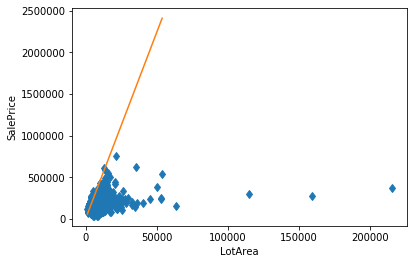

epoch:  10 loss:3.27182e+10 grad a:1.93908e+11 grad b: -3.37508e+06 val loss: 1.94629e+13


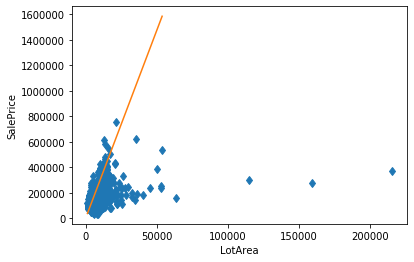

epoch:  20 loss:3.26572e+10 grad a:1.9469e+11 grad b: -3.23933e+06 val loss: 1.9426e+13


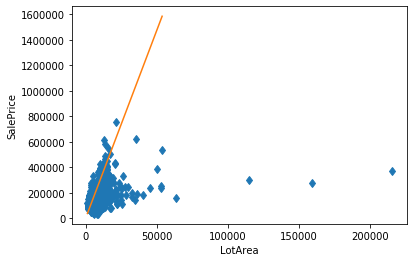

epoch:  30 loss:3.26571e+10 grad a:1.94691e+11 grad b: -3.23918e+06 val loss: 1.94259e+13


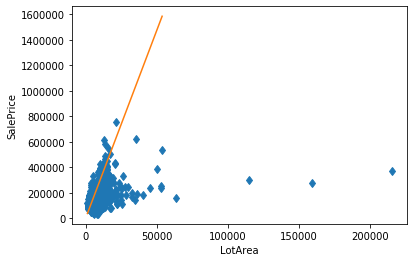

epoch:  40 loss:3.26571e+10 grad a:1.94691e+11 grad b: -3.2391e+06 val loss: 1.94259e+13


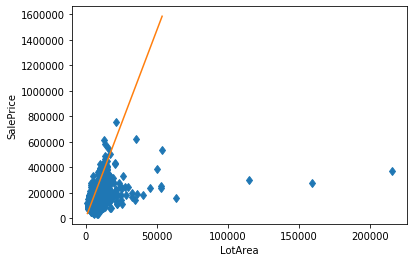

epoch:  50 loss:3.26571e+10 grad a:1.94692e+11 grad b: -3.23898e+06 val loss: 1.94258e+13


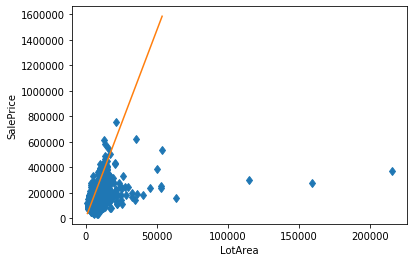

epoch:  60 loss:3.26571e+10 grad a:1.94691e+11 grad b: -3.23902e+06 val loss: 1.94259e+13


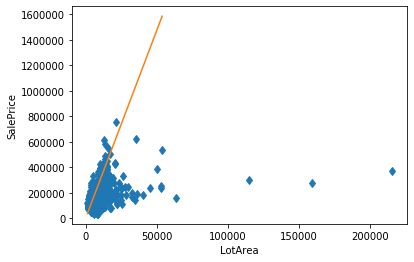

epoch:  70 loss:3.2657e+10 grad a:1.94692e+11 grad b: -3.23896e+06 val loss: 1.94258e+13


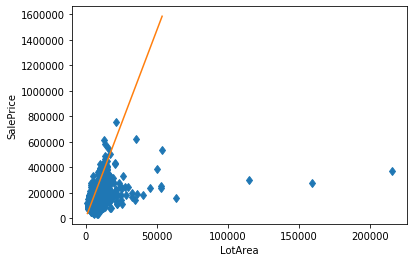

epoch:  80 loss:3.26569e+10 grad a:1.94692e+11 grad b: -3.23889e+06 val loss: 1.94257e+13


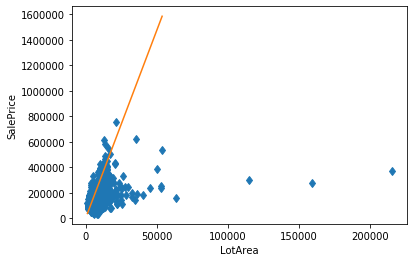

epoch:  90 loss:3.26569e+10 grad a:1.94692e+11 grad b: -3.23887e+06 val loss: 1.94257e+13


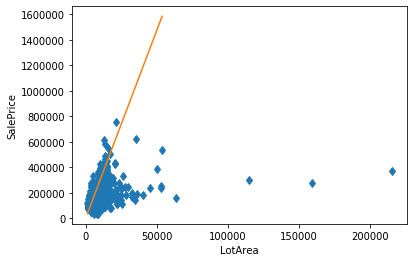

epoch: 100 loss:3.26569e+10 grad a:1.94691e+11 grad b: -3.23885e+06 val loss: 1.94257e+13


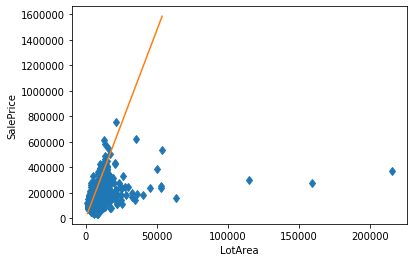

In [92]:
n_epochs = 101
learning_rate = 1e-12

theta = torch.zeros((2,), requires_grad=True)
plot_now()

for e in range(n_epochs):
    for x, y in zip(train_X, train_y):
        loss = cost(h1, theta, x, y)
        loss.backward() # will create .grad
        theta.data.sub_(learning_rate * theta.grad.data)
    with torch.no_grad():
        if e % 10 == 0:
            print((f'epoch:{e:4d} loss:{N(loss):10g} grad a:{N(theta.grad.data[0]):10g} '
                       f'grad b: {N(theta.grad.data[1]):10g} val loss: {N(cost(h1, theta, val_X, val_y)):10g}'))
            plot_now()
    theta.grad.zero_()


- trace of A is sum of diagonal entries. $tr(A) = \sum{A_{ii}}$ https://en.wikipedia.org/wiki/Trace_(linear_algebra)
- $trA = trA^T$
- $f(A) = tr(AB)$, then $df(A)/d(A) = B^T$
- $tr(AB) = tr(BA)$, $tr(ABC) = tr(CAB)$
- $d tr(AA^TC) = CA + C^TA$, analogous to $d(a^2c)/da= 2ac$
- Design metrix $X$
- $(X\theta - y)^2 = (X\theta - y)^T(X\theta - y)$, analogous to $z^T z = \sum_{i}z^2$
- Optimum, global minimum $\theta$ is, $\theta = (X^TX)^{-1} X^T y$